In [1]:
cd ..

/home/mars/src_aiai


In [2]:
import pickle
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from src.visualisation import compare, print_statistics, plot_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [5]:
data = "COCO"
ISNR = 30

In [29]:
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
    ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

    ("U-net", "unet", "_sigmoid"),
    ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
    ("dU-net", "dunet", "_sigmoid"),
    ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
    ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
    ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
    ("U-net long", "unet", "_sigmoid_long"),
    ("dU-net dirty", "dunet", "_sigmoid_upsample_grad_dirty"),
    
    ("U-net same", "unet", "_sigmoid_same"),
    ("dU-net same", "dunet", "_sigmoid_same"),
]


In [30]:
results = []
results += [(name, "Train", f"./data/processed/{data}/train_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [(name, "Test", f"./data/processed/{data}/test_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train", "Test"]]
# results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train"]]


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]

In [26]:
statistics = pd.read_csv(f"./results/{data}/statistics.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics.dropna(inplace=True)

In [9]:
print(set(statistics.Method))

{'dU-net learned grad', 'dU-net', 'dU-net learned adjoint', 'dU-net same', 'U-net', 'U-net learned adjoint', 'dU-net dirty', 'U-net long', 'dU-net grad upsample', 'Primal Dual', 'Learned Adjoint', 'Adjoint', 'U-net same'}


In [10]:
# statistics = statistics[statistics.Set == "Train"]
# from src.visualisation import results_and_metrics
# name_net_post, results, metrics = results_and_metrics("COCO", 30)
# results = [ results[0], results[2], results[4], results[-1]]

In [11]:
# statistics = statistics[[ statistics.Method.iloc[i] in ['Adjoint', "U-net", 'dU-net', "dU-net dirty", "Primal Dual"]  for i in range(len(statistics))] ]

|Name                                    |PSNR                |SSIM                |MSE                 |
|Adjoint_Test                            |   7.612 \pm   2.482|   0.094 \pm   0.053|   0.199 \pm   0.100|
|Adjoint_Train                           |   7.465 \pm   2.330|   0.099 \pm   0.054|   0.203 \pm   0.096|
|Learned Adjoint_Test                    |   9.615 \pm  24.938|   0.130 \pm   0.085|   0.185 \pm   0.089|
|Learned Adjoint_Train                   |  10.772 \pm  32.712|   0.136 \pm   0.100|   0.188 \pm   0.087|
|Primal Dual_Test                        |     nan \pm     nan|     nan \pm     nan|     nan \pm     nan|
|Primal Dual_Train                       |   8.018 \pm   4.778|   0.116 \pm   0.231|   0.229 \pm   0.143|
|U-net_Test                              |  20.207 \pm   3.078|   0.678 \pm   0.124|   0.011 \pm   0.007|
|U-net_Train                             |  20.302 \pm   3.367|   0.685 \pm   0.126|   0.011 \pm   0.006|
|U-net learned adjoint_Test              |  18

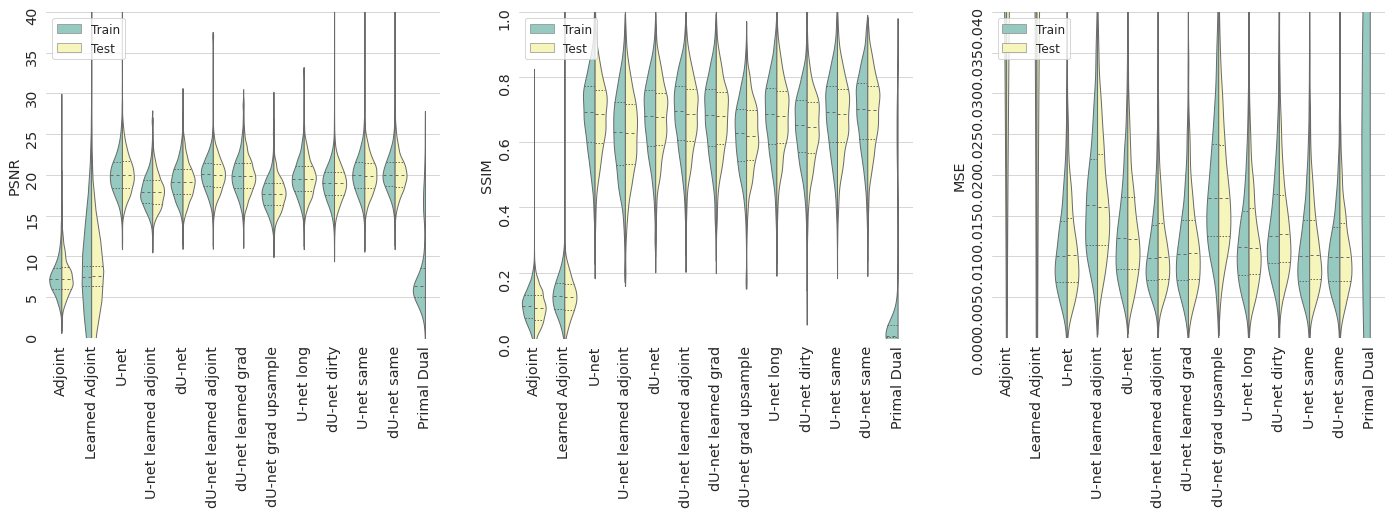

In [31]:
print_statistics(statistics, results, metrics)
plot_statistics(statistics, metrics)

In [28]:
examples = pickle.load(open(f"./results/{data}/examples.pkl", "rb"))

In [14]:
train_ims = []
test_ims = []
train_titles = []
test_titles = []

for name, mode, im in examples:
    if mode == "Train":
        train_ims.append(im)
        train_titles.append(name)
    else:
        test_ims.append(im)
        test_titles.append(name)

In [15]:
train_ims[0].shape

(5, 256, 256)

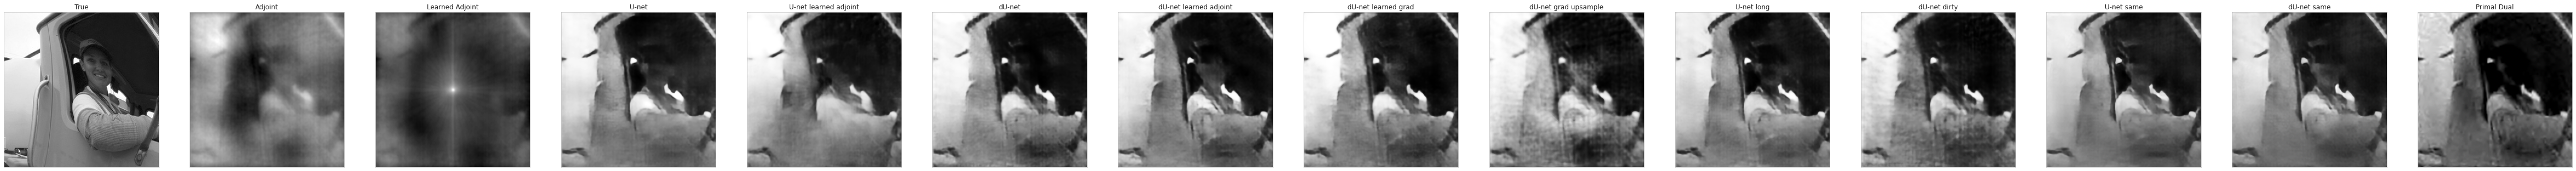

In [16]:
i=0
compare([ims[i] for ims in train_ims], ncols=5, nrows=2, titles=train_titles, same_scale=False)

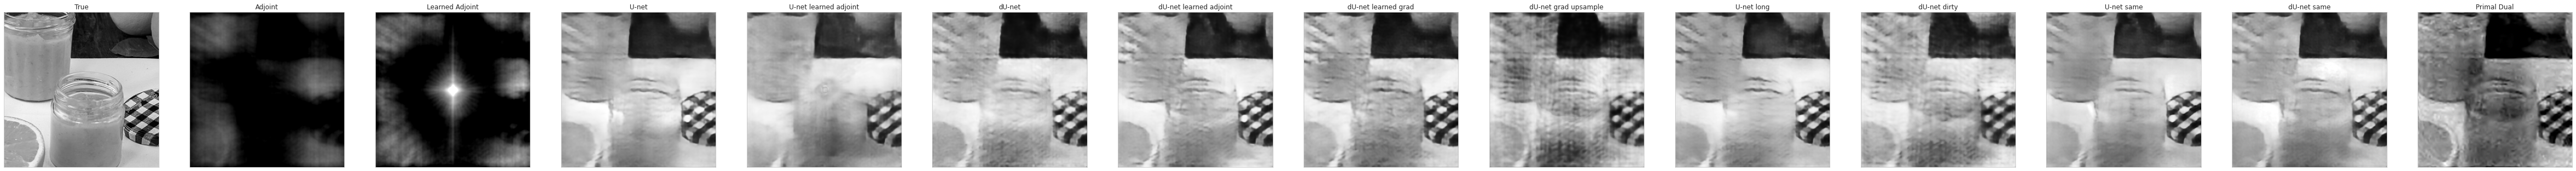

1


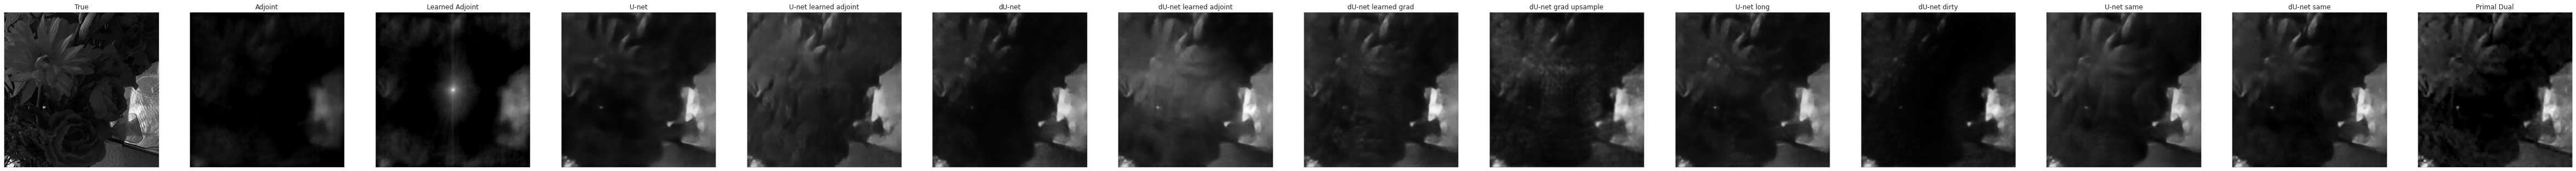

2


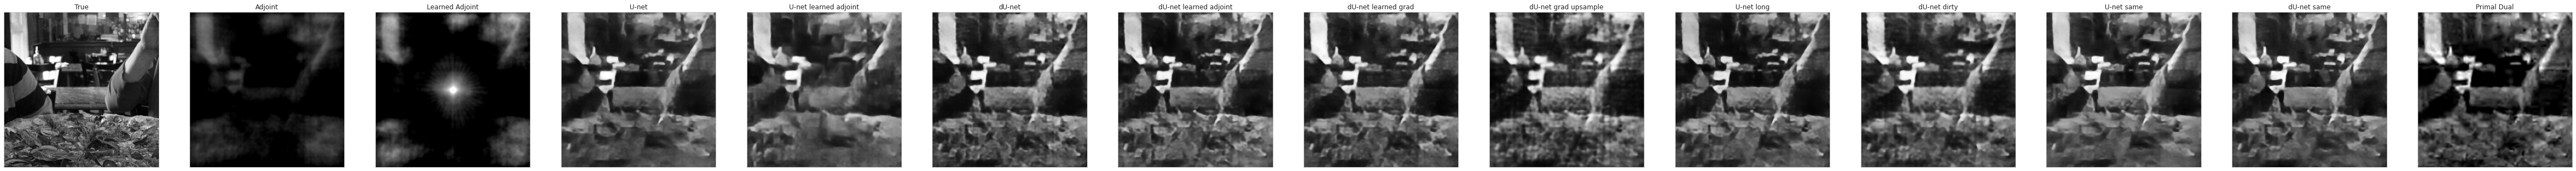

3


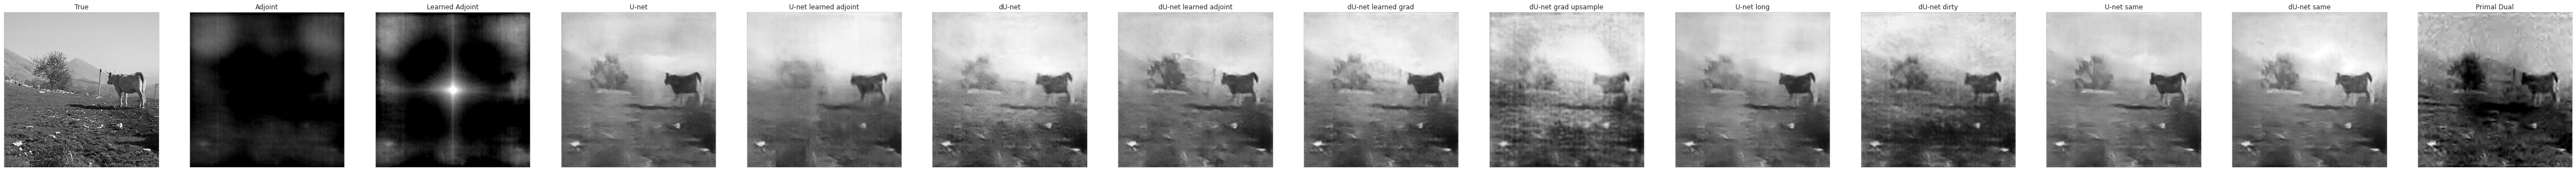

4


In [17]:
for i in range(1,5):
    compare([ims[i] for ims in train_ims], ncols=5, nrows=2, titles=train_titles, same_scale=True)
    print(i)

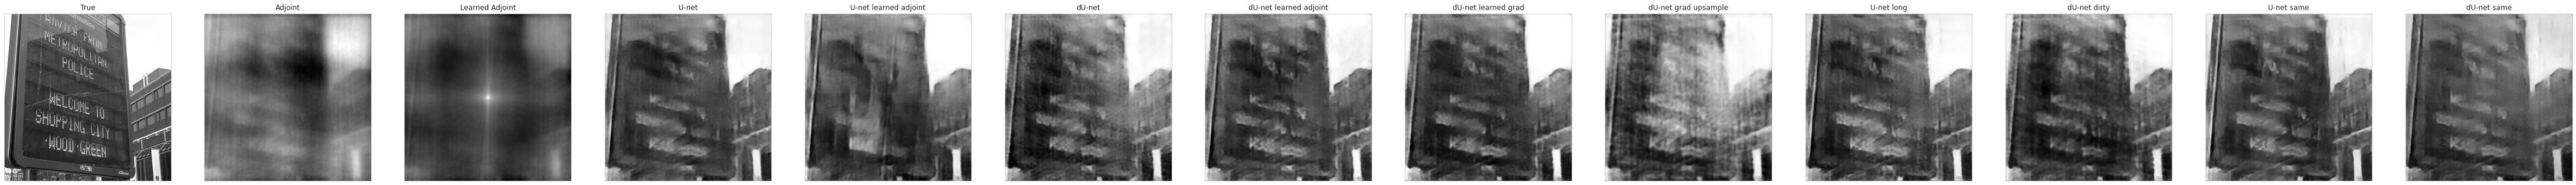

In [18]:
i=0
compare([ims[i] for ims in test_ims], ncols=5, nrows=2, titles=train_titles, same_scale=False)

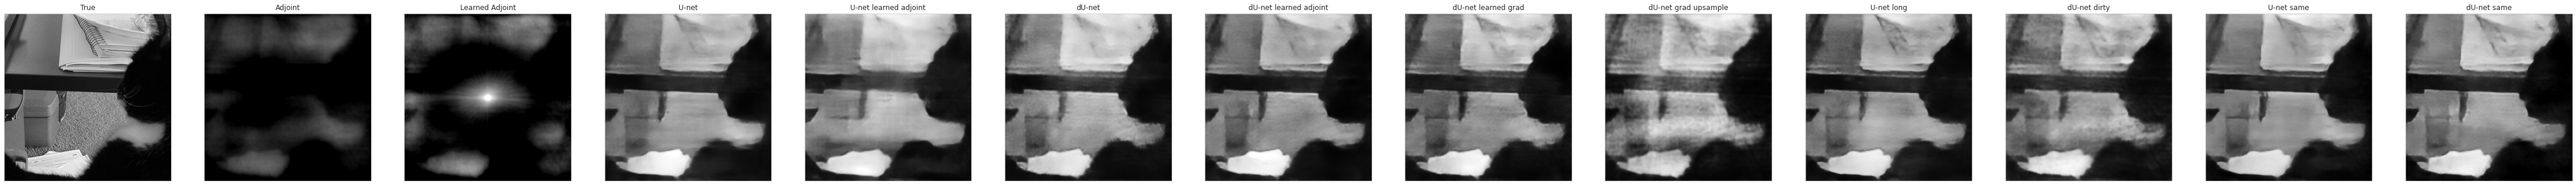

1


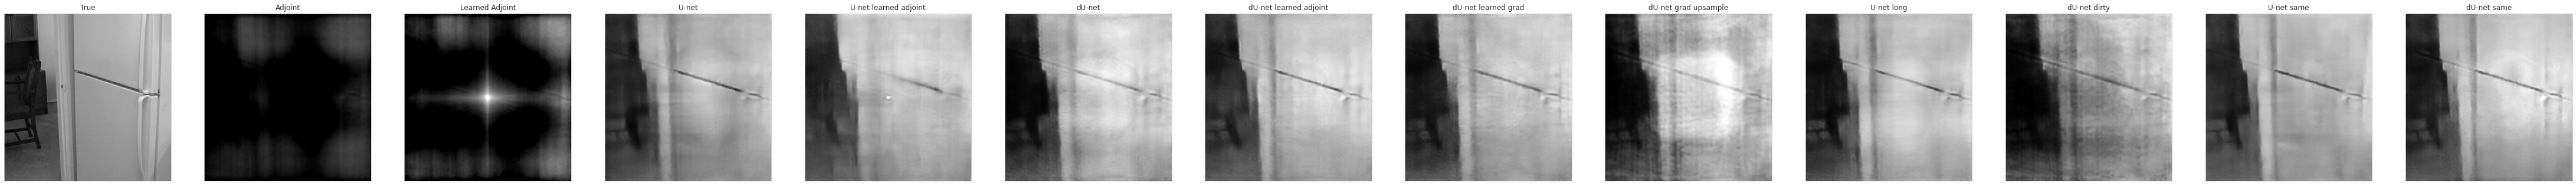

2


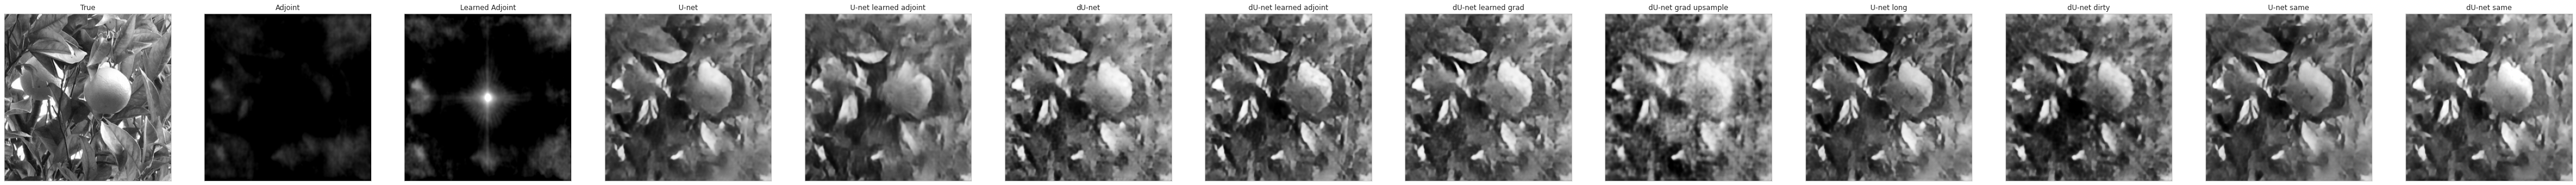

3


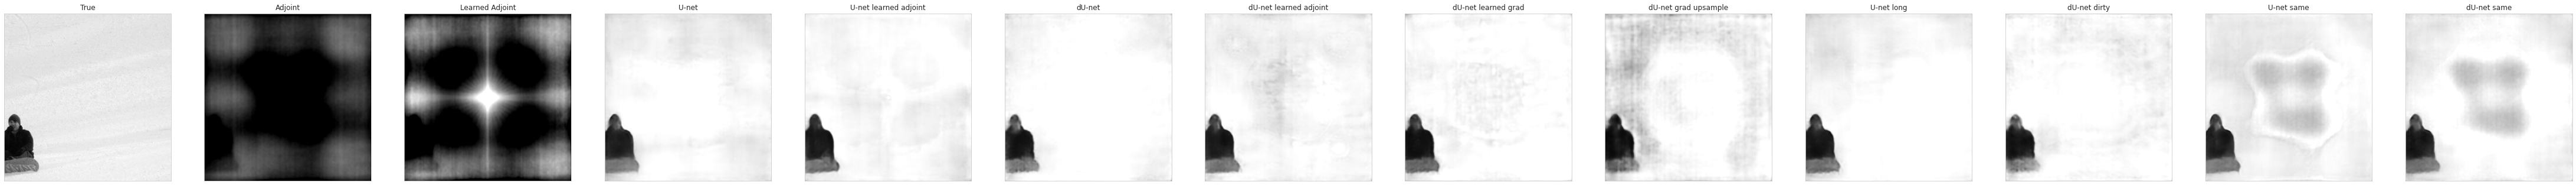

4


In [19]:
for i in range(1,5):
    compare([ims[i] for ims in test_ims], ncols=5, nrows=2, titles=train_titles, same_scale=True)
    print(i)

In [20]:
statistics_robustness = pd.read_csv("COCO_statistics_robustness.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics_robustness.dropna(inplace=True)

In [21]:
set(statistics_robustness.Method)

{'Adjoint',
 'Learned Adjoint',
 'U-net',
 'U-net learned adjoint',
 'U-net same',
 'dU-net',
 'dU-net dirty',
 'dU-net grad upsample',
 'dU-net learned adjoint',
 'dU-net learned grad',
 'dU-net same'}

Text(0, 0.5, 'reconstruction PSNR (dB)')

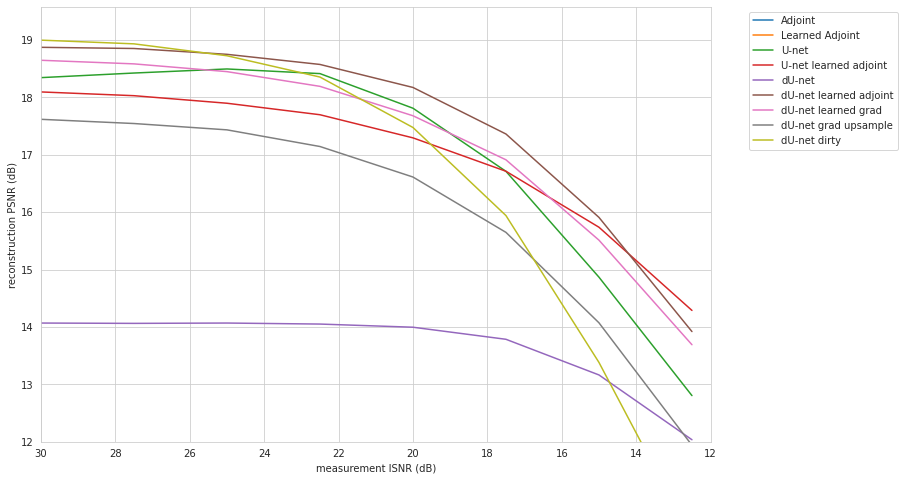

In [22]:
plt.figure(figsize=(12,8))
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Test":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values, label = name)

plt.axis(ymin=12, xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("measurement ISNR (dB)")
plt.ylabel("reconstruction PSNR (dB)")

In [23]:
results

[('Adjoint',
  'Train',
  './data/processed/COCO/train_predict_adjoint_30dB_sigmoid.npy'),
 ('Learned Adjoint',
  'Train',
  './data/processed/COCO/train_predict_adjoint_30dB_sigmoid_learned_adjoint.npy'),
 ('U-net',
  'Train',
  './data/processed/COCO/train_predict_unet_30dB_sigmoid.npy'),
 ('U-net learned adjoint',
  'Train',
  './data/processed/COCO/train_predict_unet_30dB_sigmoid_learned_adjoint.npy'),
 ('dU-net',
  'Train',
  './data/processed/COCO/train_predict_dunet_30dB_sigmoid.npy'),
 ('dU-net learned adjoint',
  'Train',
  './data/processed/COCO/train_predict_dunet_30dB_sigmoid_learned_adjoint.npy'),
 ('dU-net learned grad',
  'Train',
  './data/processed/COCO/train_predict_dunet_30dB_sigmoid_learned_grad.npy'),
 ('dU-net grad upsample',
  'Train',
  './data/processed/COCO/train_predict_dunet_30dB_sigmoid_upsample_grad.npy'),
 ('dU-net dirty',
  'Train',
  './data/processed/COCO/train_predict_dunet_30dB_sigmoid_upsample_grad_dirty.npy'),
 ('Adjoint',
  'Test',
  './data/proce

Text(0, 0.5, 'reconstruction SSIM ')

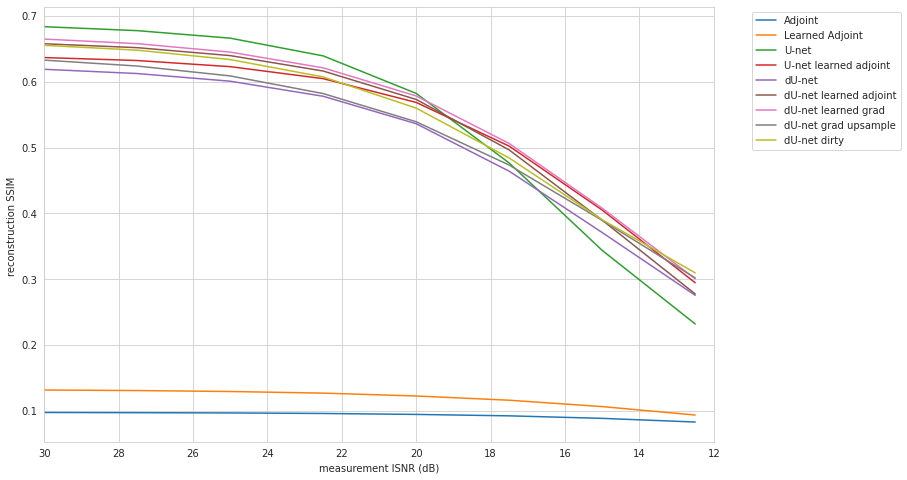

In [24]:
plt.figure(figsize=(12,8))
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Train":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, label = name)

plt.axis( xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("measurement ISNR (dB)")
plt.ylabel("reconstruction SSIM ")